In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

0 : C : score
1 : D : level of difficulty
2 : F : name
3 : I : reaction times
4 : K : right reaction
5 : L : false reaction
6 : M : right/false sequance
7 : O : game over 

In [17]:
sample1 = pd.read_excel('Clouds-+18Competition.xlsx', usecols= "C,D,F,I,K,L,M,O")
#print(sample1)

sample2 = pd.read_excel('Clouds-13to18Competition.xlsx', usecols= "C,D,F,I,K,L,M,O")
#print(sample2)

sample3 = pd.read_excel('Clouds-U13Competition.xlsx', usecols= "C,D,F,I,K,L,M,O")
#print(sample3)

rows1 = len(sample1)
rows2 = len(sample2)
rows3 = len(sample3)

Reads the score of one leve:

In [4]:
def read_score(row):
    return sample1.iloc[row , 0]

Reads the reaction times of one level:

In [5]:
def read_RT(row):
    RTstr = sample1.iloc[row , 3]
    RTlist = [int(i) for i in RTstr.split(",")]
    return RTlist


Calculates the average reaction time for one level:

In [6]:
def RT_mean_level(row):
    RTlist = read_RT(row)
    return (np.sum(RTlist)) / (len(RTlist))

In [7]:
def Mean_for_each_student(readfunc):

    Mean = []

    sum = readfunc(0)
    n = 1
    m = 0
    for i in range (1 , rows1):
        if bool(sample1.iloc[i, 7]) is False:
            sum = sum + readfunc(i)
            n = n+1
        else:
            Mean.append(sum/n)
            n = 1
            m = m+1
            sum = readfunc(i)
    Mean.append(sum/n)

    return Mean


In [8]:
def Var_for_each_student(readfunc):
    Var = []

    OneStudent = [readfunc(0)]
    n = 1
    m = 0
    for i in range (1 , rows1):
        if bool(sample1.iloc[i, 7]) is False:
            OneStudent.append(readfunc(i))
        else:
            variance = st.variance(OneStudent)
            Var.append(variance)
            del OneStudent[1:]
            OneStudent[0] = readfunc(i)
    variance = st.variance(OneStudent)
    Var.append(variance)

    return Var

In [9]:
def plot_hist(arr, name, clr):
    plt.hist(arr, color = clr)
    plt.xlabel(name)

Mean of scores:

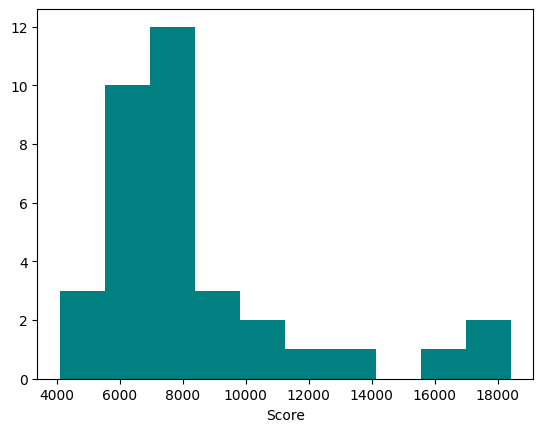

In [10]:
Score_Mean = Mean_for_each_student(read_score)

plot_hist(Score_Mean, "Score", "teal")


Mean of reaction times:

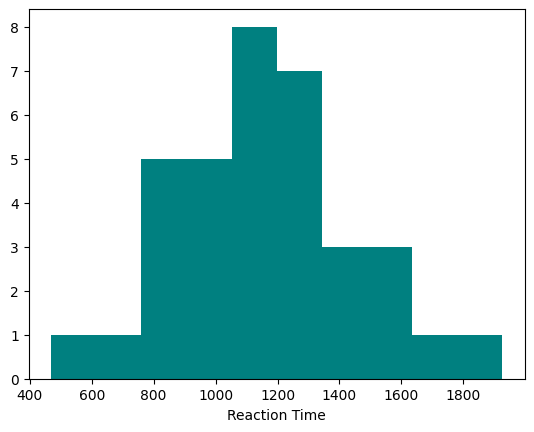

In [11]:
RT_Mean = Mean_for_each_student(RT_mean_level)

plot_hist(RT_Mean, "Reaction Time", "teal")

Variance of Scores:

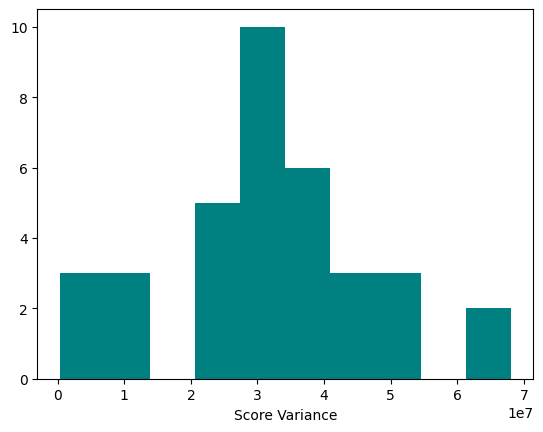

In [12]:
ScoreVariance = Var_for_each_student(read_score)

plot_hist(ScoreVariance, "Score Variance", "teal")

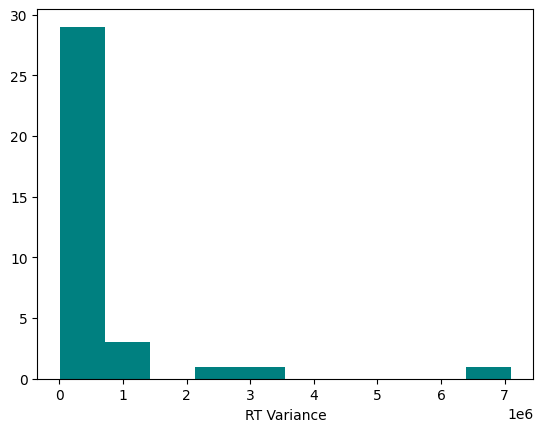

In [13]:
RTVariance = Var_for_each_student(RT_mean_level)

plot_hist(RTVariance, "RT Variance", "teal")

It checks if a level is played completely by the number of trues and falses

In [14]:
def LevelCheck (level, T, F):
    if level == 2:
        if (T+F) == 2:
            return 1
        else:
            return False
    elif level == 4:
        if (T+F) == 3:
            return 2
        else:
            return False
    elif level == 7:
        if (T+F) == 4:
            return 3
        else:
            return False
    elif level == 8:
        if (T+F) == 4:
            return 4
        else:
            return False
    elif level == 11:
        if (T+F) == 5:
            return 5
        else:
            return False

In [15]:
LevelsAccSum = np.zeros(5)  #the sum of accuracy for each level
LevelNum = np.zeros(5)      #for counting each level's num

for i in range(rows1):
    level = int(sample1.iloc[i ,1])
    T = int(sample1.iloc[i, 4])
    F = int(sample1.iloc[i, 5])
    
    LIndex = LevelCheck(level, T, F)        #if the level is completed, it gets the index of the level [2,4,7,8,11]
    if LIndex:
        Acc = T / (T+F)
        LevelNum[(LIndex-1)] += 1  
        LevelsAccSum[(LIndex-1)] += Acc
    
LevelsAcc = [LevelsAccSum[i]/LevelNum[i] for i in range(5) ]
print(LevelsAcc)


[0.9820143884892086, 0.9550264550264551, 0.9107142857142857, 0.8928571428571429, 0.8616666666666661]


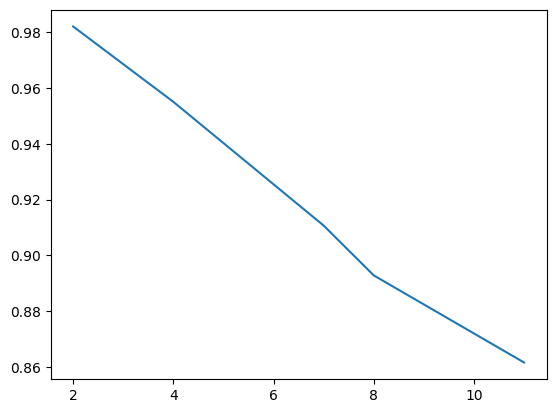

In [16]:
levels = [2, 4, 7, 8, 11]
plt.plot(levels, LevelsAcc)
plt.show()